# CUSTOMER SEGMENTATION

***

## ONLINE RETAIL DATASET


<img src="https://img.freepik.com/free-vector/postman-giving-parcel-customer-post-office_74855-4811.jpg" width="626" height="250" >

At vero eos et accusamus et iusto odio dignissimos ducimus qui blanditiis praesentium voluptatum deleniti atque corrupti quos dolores et quas molestias excepturi sint occaecati cupiditate non provident, similique sunt in culpa qui officia deserunt mollitia animi, id est laborum et dolorum fuga. Et harum quidem rerum facilis est et expedita 

distinctio. Nam libero tempore, cum soluta nobis est eligendi optio cumque nihil impedit quo minus id quod maxime placeat facere possimus, omnis voluptas assumenda est, omnis dolor repellendus. Temporibus autem quibusdam et aut 

officiis debitis aut rerum necessitatibus saepe eveniet ut et voluptates repudiandae sint et molestiae non recusandae. Itaque earum rerum hic tenetur a sapiente delectus, ut aut reiciendis voluptatibus maiores alias consequatur aut perferendis doloribus asperiores repellat.

# FUNCTIONS

In [1]:
def set_chart_settings(title):
    
    plt.title(title)
    sns.despine(bottom = True, left = True)
    
    
def create_kmeans_cluster_column(column, ascending):
    kmeans = KMeans(n_clusters=4)
    X_std = scaler.fit_transform(rfm[[column]])
    
    kmeans.fit(X_std)
    column_name = column + '_cluster'
    rfm[column_name] = kmeans.predict(X_std)
    
    rfm_cluster = rfm.groupby(column_name)[[column]].describe()
    rfm_cluster.columns = rfm_cluster.columns.droplevel(0)
    
    rfm_cluster = rfm_cluster.reset_index().sort_values(
    by='mean', ascending = ascending).reset_index().drop(columns=({
                                         'index',
                                         column_name
                                          })).rename_axis('cluster_' + column)
    
    return rfm_cluster

# LIBS 

In [2]:
import pandas                   as pd
import seaborn                  as sns
import matplotlib.pyplot        as plt
import numpy                    as np

import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# DATASET

## CUSTOMER DATASET

In [3]:
customer = pd.read_csv('customer.csv', sep = ';')

In [4]:
customer.head()

,CustomerID,gender,age,anual_income
0,17850.0,Female,48,25
1,13047.0,Male,47,65
2,12583.0,Female,47,78
3,13748.0,Female,59,43
4,15100.0,Female,31,33


## SALES DATASET

In [5]:
df = pd.read_csv('data.csv', encoding = 'latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

# DATA ANALYSIS 

## GENERAL ANALYSIS

In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')

In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df.groupby('Country')['CustomerID'].count().sort_values(ascending = False)

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [11]:
df['Country'].value_counts(normalize = True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

***

More than 90% of the data is from UK sales, so, we're going to restrict the data to the United Kingdom only.


As we could see in the previous snippet, null customer ID represents 135.080 records. Our analysis is based on clients, so we're going to drop all missing values in this column as well.

In [12]:
df = df[df['Country'] == 'United Kingdom']

# removing null values
df = df[~df['CustomerID'].isnull()]

In [13]:
# checking negative values or incorrect dates
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

print(df['UnitPrice'].min())
print(df['UnitPrice'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00
0.0
38970.0


In [14]:
print(df['Quantity'].min(), df['Quantity'].max())
print(df[df['Quantity'] < 0].shape)
print(df.shape)

-80995 80995
(7533, 8)
(361878, 8)


***

As we can see, there're 7.533 negative values in quantity column. It's clear that're wrong numbers.
Before dropping them or replacing by other numbers, let's analyze some basic descriptive statistics.

In [15]:
df['Quantity'].describe()

count    361878.000000
mean         11.077029
std         263.129266
min      -80995.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [16]:
df[df['Quantity'] > 0].describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [17]:
df['Quantity'].value_counts().head(10)

1     71401
2     54798
12    49710
6     32181
4     28726
3     25159
24    19702
10    18446
8      9527
5      7707
Name: Quantity, dtype: int64

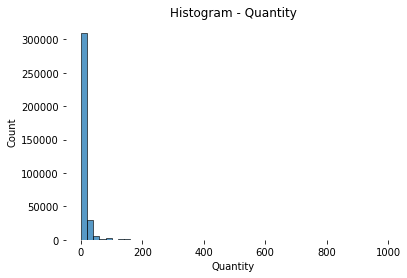

In [18]:
sns.histplot(data = df[(df['Quantity'] > 0) & (df['Quantity'] < 1000)], x = 'Quantity', bins = 50)
set_chart_settings('Histogram - Quantity')

In [19]:
print(df[df['Quantity'] < 0].shape[0],
df[df['Quantity'] > 100].shape[0],
df[df['Quantity'] > 500].shape[0],
df[df['Quantity'] > 600].shape[0],
df[df['Quantity'] > 1000].shape[0])

7533 3289 357 236 97


In [20]:
df[df['Quantity'] < 0]['Quantity'].value_counts().head(10)


-1     3331
-2     1115
-3      472
-12     409
-4      386
-6      366
-24     195
-5      159
-10     134
-8      129
Name: Quantity, dtype: int64

***

Negative values are pretty similar to positive ones. Looks like they were mistyped, so, as a faster solution, we're going to replace all negative values by positive values, using abs() function.

In [21]:
df['Quantity'] = df['Quantity'].apply(lambda x: abs(x) if x < 0
                    else x)

In [22]:
print(df['Quantity'].min(), df['Quantity'].max())
print(df[df['Quantity'] < 0].shape[0])
print(df.shape[0])

1 80995
0
361878


## DATA ANALYSIS

In [23]:
df1 = df.copy(deep = True)

***

We're going to create a revenue column:

Quantity sold * Unit Price

In [24]:
df1['revenue'] = df1['Quantity'] * df1['UnitPrice']
df1.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
85703,543507,22386,JUMBO BAG PINK POLKADOT,10,2011-02-09 10:49:00,1.95,15039.0,United Kingdom,19.50
399144,571272,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,2,2011-10-16 12:19:00,12.75,13878.0,United Kingdom,25.50
241334,558197,21209,MULTICOLOUR HONEYCOMB FAN,96,2011-06-27 12:45:00,0.39,14298.0,United Kingdom,37.44
12325,537374,22867,HAND WARMER BIRD DESIGN,1,2010-12-06 12:55:00,2.10,17259.0,United Kingdom,2.10
387263,570273,22955,36 FOIL STAR CAKE CASES,12,2011-10-10 10:51:00,2.10,13373.0,United Kingdom,25.20


***

From InvoiceDate column, we can create some features as day of the week, day name, whether is workday or not, periodof the day, holiday, etc.

In this notebook, we're going to create 3 more features, as following:

1 - Name of the day

2 - Workweek x weekend

4 - Day period

In [25]:
# "spliting" date and hour
df1['date'] = df1['InvoiceDate'].dt.date
df1['time'] = df1['InvoiceDate'].dt.time

In [26]:
# day of the week
df1['day_of_week'] = df1['InvoiceDate'].apply(lambda x: x.strftime('%A'))

In [27]:
# Saturday or sunday
df1['weekend'] = df1['day_of_week'].apply(lambda x: 1 if x == 'Saturday' or x == 'Sunday'
                        else 0)

In [28]:
# day period
print(df1['time'].min(), df1['time'].max())

now = datetime.datetime.now()
period = now.replace(hour=12, minute=0, second=0, microsecond=0)

# creating day period
df1['day_period'] = df1['InvoiceDate'].apply(lambda x: 'before_noon' if x.time() < period.time()
                                else 'after_noon')


06:10:00 20:38:00


In [29]:
# checking
print(df1[df1['day_period'] == 'before_noon']['time'].min())
print(df1[df1['day_period'] == 'before_noon']['time'].max())

print(df1[df1['day_period'] == 'after_noon']['time'].min())
print(df1[df1['day_period'] == 'after_noon']['time'].max())


06:10:00
11:59:00
12:00:00
20:38:00


## DATA VISUALIZATION

In [30]:
df2 = df1.copy(deep = True)

***

The final dataset in this section has 14 columns:

- 'InvoiceNo'
- 'StockCode'
- 'Description'
- 'Quantity'
- 'InvoiceDate',
- 'UnitPrice'
- 'CustomerID'
- 'Country'
- 'revenue'
- 'date'
- 'time',
- 'day_of_week'
- 'weekend'
- 'day_period'

To make this section easier, we're going to drop some of these columns, as follows:

1. **InvoiceNo**: we don't need this information for the purpose of this analysis

2. **StockCode**: No information for the purpose of this analysis

3. **Description**: The description column could be a good information, but for now, we're going to focus on others variables that don't need so much cleaning.

4. **InvoiceDate**: We've created some other features based on this column, so, we no longer need this variable anymore.

5. **Country**: It's all about United Kingdom, so, no need this column either.



In [31]:
cols = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
df2 = df2.drop(columns=(cols))

In [32]:
df2.head()

,Quantity,UnitPrice,CustomerID,revenue,date,time,day_of_week,weekend,day_period
0,6,2.55,17850.0,15.30,2010-12-01,08:26:00,Wednesday,0,before_noon
1,6,3.39,17850.0,20.34,2010-12-01,08:26:00,Wednesday,0,before_noon
2,8,2.75,17850.0,22.00,2010-12-01,08:26:00,Wednesday,0,before_noon
3,6,3.39,17850.0,20.34,2010-12-01,08:26:00,Wednesday,0,before_noon
4,6,3.39,17850.0,20.34,2010-12-01,08:26:00,Wednesday,0,before_noon


### Quantity

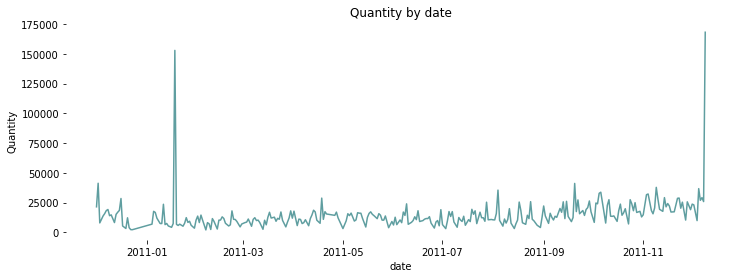

In [33]:
plt.figure(figsize = (12,4))

ax = sns.lineplot(data = df2[['date', 'Quantity']].groupby('date', as_index= False).sum(),  x = 'date',
                  y ='Quantity',
                 color = 'cadetblue')
set_chart_settings('Quantity by date')

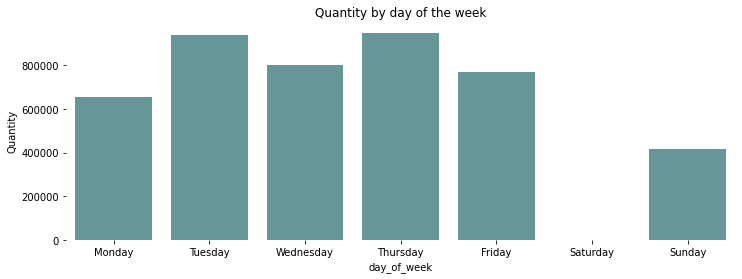

In [34]:
plt.figure(figsize = (12,4))

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(data = df2[['day_of_week', 'Quantity']].groupby('day_of_week', as_index= False).sum(),  x = 'day_of_week',
                 y ='Quantity',
                color = 'cadetblue',
                order = order)
set_chart_settings('Quantity by day of the week')

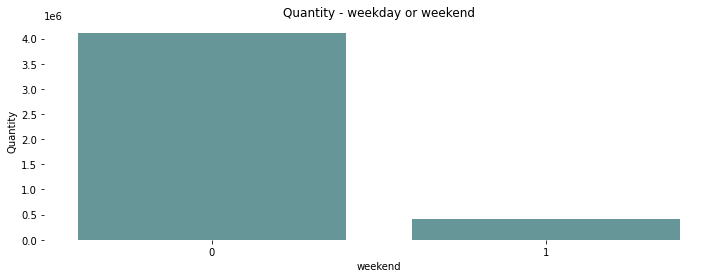

In [35]:
plt.figure(figsize = (12,4))


ax = sns.barplot(data = df2[['weekend', 'Quantity']].groupby('weekend', as_index= False).sum(),
                 x = 'weekend',
                 y ='Quantity',
                color = 'cadetblue',
)
set_chart_settings('Quantity - weekday or weekend')

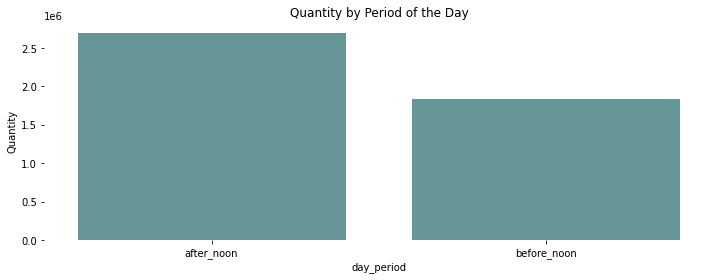

In [36]:
plt.figure(figsize = (12,4))


ax = sns.barplot(data = df2[['day_period', 'Quantity']].groupby('day_period', as_index= False).sum(),
                 x = 'day_period',
                 y ='Quantity',
                color = 'cadetblue',
)
set_chart_settings('Quantity by Period of the Day')

***

1. The quantity sold by date has two peaks (2011-02 and 2011-12). Although we can see some variations, there's a pattern in the line chart.

2. We don't have any data on Saturdays (might have an issue in this data). It should be investigate further.

3. Thusday and Thursday are the days of the weeks with more quantity sold.

4. There're much more sales during the week.

5. There're more sales after noon

## CUSTOMER ANALYSIS

### COHORT ANALYSIS


*****

Cohort analysis is a technique that divides data into groups of people who share common characteristics or behavior over a period of time.
This method makes it easier for organizations to detect patterns, improve user retention, analyze users' lifecycles and compare different groups or cohorts.

Some examples are:

- Apps/website - User engagement: How often people are engaging in your app or website.

- Sales - How often a group of people is buying your products / returning to buy again

- Education - A group of people who begin schooling at the same time and how it changes over time

To make the example easier, let's imagine the following situation: A group of people who started following you in January. What percentage of this group has engaged in your posts in the following months?

Dividing them into groups and analyzing their behavior is the Cohort's purpose.

In [37]:
df3 = df2[['CustomerID', 'date' ,'revenue']]

In [38]:
#converting date column and extracting the month and year
df3 = df3.copy()
df3['date'] = df3['date'].astype('datetime64')
df3['month'] = df3['date'].apply(lambda x: x.strftime('%Y-%m'))

df3.sample()

,CustomerID,date,revenue,month
165716,14001.0,2011-04-21,75.0,2011-04


In [39]:
#getting the first date by client
df3 = df3.set_index('CustomerID')
df3['cohort'] = df3.groupby(level = 0)['month'].min()
df3 = df3.reset_index()

df3.head()

,CustomerID,date,revenue,month,cohort
0,17850.0,2010-12-01,15.30,2010-12,2010-12
1,17850.0,2010-12-01,20.34,2010-12,2010-12
2,17850.0,2010-12-01,22.00,2010-12,2010-12
3,17850.0,2010-12-01,20.34,2010-12,2010-12
4,17850.0,2010-12-01,20.34,2010-12,2010-12


In [40]:
cohort = df3.groupby(['cohort', 'month'])
cohort2 = cohort.agg({'CustomerID' : pd.Series.nunique})
cohort2 = cohort2.rename(columns ={'CustomerID' : 'total_customers'})


In [41]:
def plot_cohort_period(df3):
    df3['cohort_period'] = np.arange(len(df3)) +1
    return df3

cohort2 = cohort2.groupby(level = 0).apply(plot_cohort_period)
cohort2 = cohort2.reset_index().set_index(['cohort', 'cohort_period'])
#cohort2.set_index(['cohort', 'cohort_period'])


In [42]:
cohort_grouped_size = cohort2['total_customers'].groupby(level=0).first()

In [43]:
users = cohort2['total_customers'].unstack(0).divide(cohort_grouped_size, axis = 1)

<AxesSubplot:xlabel='cohort_period', ylabel='cohort'>

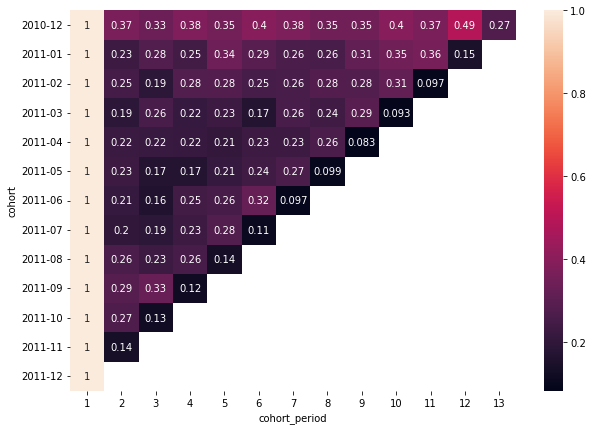

In [44]:
plt.figure(figsize = (10, 7))
sns.heatmap(users.T, mask = users.T.isnull(), annot = True)


***

In this Cohort, there's not much difference over time. The sales percentage remains around 0.30%.

In other words, the group percentage of people who made the first purchase in the first period (number 1 in X axis) and bought again in the second period (number 2 in X axis) is 0.30%.

### RFM TABLE


***

In this section, we're going to create a RFM table.

RMF stands for Recency, Frequency and Monetary value. These metrics have proven to be really effectivate predictor's to measure engagement and retention of customers.

- Recency: How recently did the customer purchase from your company

- Frequency: How often do your customers purchase in your store or visite your website

- Monetay: How much do your customers spend in each visit ou purchase.

In [45]:
print('recency: ', now.date() - df2[df2['CustomerID'] == 12346]['date'].max())
print('frequency: ', len(df2[df2['CustomerID'] == 12346]['CustomerID']))
print('revenue: ' , df2[df2['CustomerID'] == 12346]['revenue'].sum() )

recency:  4179 days, 0:00:00
frequency:  2
revenue:  154367.2


In [46]:
now = datetime.date(year = 2012, month = 1, day = 1)

rfm = df1.groupby('CustomerID').agg({'date': lambda x: ( now- x.max()).days,
                             'CustomerID' : lambda x: len(x),
                                    'revenue': lambda x: x.sum()})

rfm = rfm.rename(columns=({'CustomerID' : 'frequency',
                          'date' : 'recency'}))
rfm = rfm.reset_index()

rfm

,CustomerID,recency,frequency,revenue
0,12346.0,348,2,154367.20
1,12747.0,25,103,4196.01
2,12748.0,23,4642,38367.36
3,12749.0,26,231,4313.56
4,12820.0,26,59,942.34
...,...,...,...,...
3945,18280.0,300,10,180.60
3946,18281.0,203,7,80.82
3947,18282.0,30,13,179.50
3948,18283.0,26,756,2094.88


#### RFM TABLE ANALYSIS

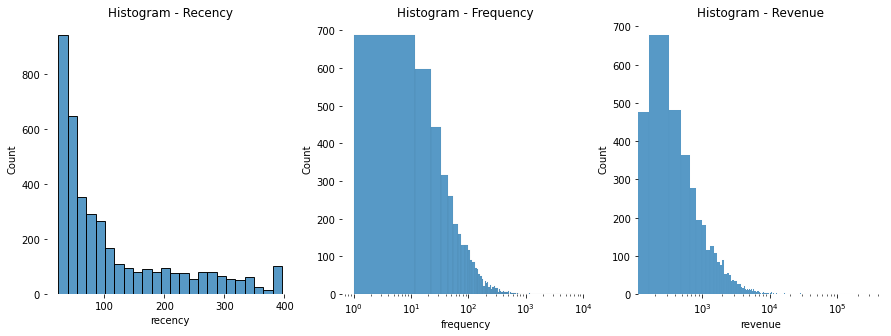

In [47]:
#recency

plt.figure(figsize = (15,5))
plt.subplot(1, 3, 1)
sns.histplot(data = rfm, x = 'recency')
set_chart_settings('Histogram - Recency')

plt.subplot(1, 3, 2)
ax2 = sns.histplot(data = rfm, x = 'frequency')
set_chart_settings('Histogram - Frequency')
ax2.set_xscale("log")


plt.subplot(1, 3, 3)
ax3 = sns.histplot(data = rfm, x = 'revenue')
set_chart_settings('Histogram - Revenue')
ax3.set_xscale("log")


In [48]:
rfm['recency'].describe()

count    3950.000000
mean      114.323038
std       100.236848
min        23.000000
25%        39.000000
50%        73.000000
75%       166.000000
max       396.000000
Name: recency, dtype: float64

In [49]:
rfm['frequency'].describe()

count    3950.000000
mean       91.614684
std       220.557389
min         1.000000
25%        17.000000
50%        41.000000
75%       101.000000
max      7983.000000
Name: frequency, dtype: float64

In [50]:
rfm['revenue'].describe()

count      3950.000000
mean       1987.065750
std        9348.700952
min           0.000000
25%         300.835000
50%         653.085000
75%        1611.307500
max      336942.100000
Name: revenue, dtype: float64

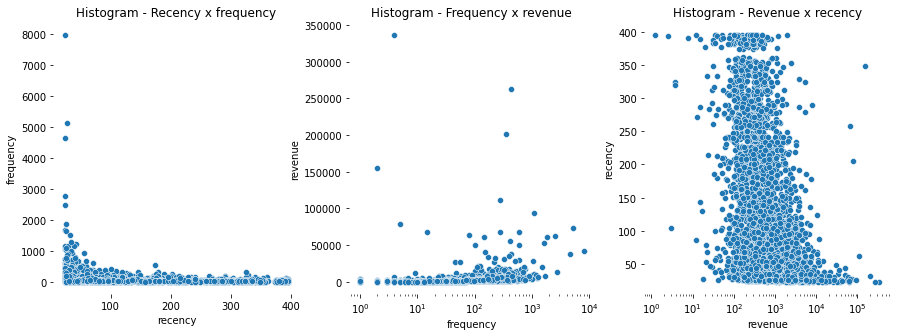

In [51]:
#recency

plt.figure(figsize = (15,5))
plt.subplot(1, 3, 1)
sns.scatterplot(data = rfm, x = 'recency', y = 'frequency')
set_chart_settings('Histogram - Recency x frequency')

plt.subplot(1, 3, 2)
ax2 = sns.scatterplot(data = rfm, x = 'frequency', y = 'revenue')
set_chart_settings('Histogram - Frequency x revenue')
ax2.set_xscale("log")

plt.subplot(1, 3, 3)
ax3 = sns.scatterplot(data = rfm, x = 'revenue', y = 'recency')
set_chart_settings('Histogram - Revenue x recency')
ax3.set_xscale("log")

## K-MEANS | GENERAL

K-means is a very famous unsupervised machine learning algorithm. 

The technique tries to group similar characteristics, creating clusters. 
To create these clusters, the algorithm works in three different steps:

1. Select the K values
    The number of groups is represented by K


2. Initialize the centroids    
    Each cluster is associated with a centroid which is predefined using the K value.


3. Assign the data point to a centroid, creating the cluster.   
    The main aim of K-Means algorithm is to minimize the sum of distances between each data point and its corresponding cluster.
    
4. Calculate the variance.

These steps will be repeated, placing a new centroid of each cluster and calculating the variance until each centroid is better positioned possible.

***

**Elbow Method**

The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. As you know, if k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

<a href="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml">"O'Reilly - The elbow method"</a>

In [52]:
scaler = StandardScaler()

X = rfm[['recency', 'frequency', 'revenue']]
x_std = scaler.fit_transform(X)

x_std

array([[ 2.33154326e+00, -4.06361491e-01,  1.63016688e+01],
       [-8.91232605e-01,  5.16271886e-02,  2.36313465e-01],
       [-9.11187873e-01,  2.06339105e+01,  3.89197391e+00],
       ...,
       [-8.41344433e-01, -3.56481535e-01, -1.93373883e-01],
       [-8.81254971e-01,  3.01268271e+00,  1.15339982e-02],
       [-4.92127234e-01, -9.80126769e-02, -1.60241209e-02]])

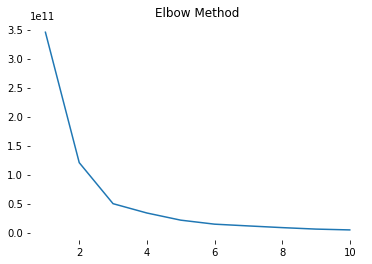

In [53]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
set_chart_settings('Elbow Method')

In [54]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')

kmeans.fit(x_std)
rfm['recency_cluster'] = kmeans.predict(x_std)

In [55]:
centroids = kmeans.cluster_centers_


### RECENCY

In [56]:
create_kmeans_cluster_column('recency', True)

,count,mean,std,min,25%,50%,75%,max
cluster_recency,,,,,,,,
0,1950.0,41.016410,13.254688,23.0,30.0,39.0,52.00,70.0
1,954.0,101.257862,22.864594,72.0,83.0,96.0,117.00,154.0
2,566.0,207.973498,31.620611,156.0,180.0,207.0,235.00,266.0
3,480.0,327.668750,41.322913,268.0,290.0,324.0,359.25,396.0


***

Based on cluster_recency variable:

1. Most of our data points are concentrated in cluster number 0 (count = 1.950).

2. It's safe to consider the first cluster as the best one since it's means is the lowest and the numbers don't vary too much (std = 13.25).


### FREQUENCY

In [57]:
create_kmeans_cluster_column('frequency', False)

,count,mean,std,min,25%,50%,75%,max
cluster_frequency,,,,,,,,
0,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0
1,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
2,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0
3,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0


***

Based on cluster_frequency variable:

1. Different from the recency section, the frequency needs to be as high as possible. Considering this, cluster number 0 is the best one, but there are only 3 data points in this cluster, making this grouping a little useless.

2. Similar situation happens with cluster number 1. There're 22 data points in this cluster. The standard deviation is not so high as cluster number 2, but it's still not so relevant.

3. Cluster number 0 looks like the most relevant one with almost 3.5k data points. The frequency mean, however, is low. The average is 49 which means that, on average, our customers purchase 49 times whereas in cluster number 1, it occurs around 331 times.


### REVENUE

In [58]:
create_kmeans_cluster_column('revenue', False)

,count,mean,std,min,25%,50%,75%,max
cluster_revenue,,,,,,,,
0,2.0,299909.105000,52372.563784,262876.11,281392.6075,299909.105,318425.6025,336942.10
1,3.0,155681.226667,45295.467280,111057.07,132712.1350,154367.200,177993.3050,201619.41
2,28.0,48644.340357,18618.093723,26205.97,31919.4300,46105.245,62654.8750,93999.38
3,3917.0,1383.713631,2154.067034,0.00,298.4100,645.650,1564.9400,21797.90


***

The cluster_revenue is pretty similar to the frequency analysis regarding customer count in each cluster.

Clusters number 0 and 1 are the best ones but the data points count within each group is irrelevant.

Cluster number 2 has a high mean value, however, 79 purchases are not so relevant either, considering the whole data dataset.

The first cluster, number 3, has a mean value very low compared to the other ones, but at the same time, concentrates the most revenue amount.

## OVERWALL SCORE

In this section, we're going to create an overall score.

To do so, let's sum each cluster (recency, frequency and revenue)


In [59]:
rfm['overall'] = rfm['recency_cluster'] + rfm['frequency_cluster'] + rfm['revenue_cluster']

In [69]:
rfm.groupby('overall')[['recency', 'frequency', 'revenue']].mean().sort_values(by='recency', ascending = True)

,recency,frequency,revenue
overall,,,
0,36.037634,336.295699,4714.790134
3,43.752387,82.385105,1683.817225
2,57.470588,798.500000,17791.690294
6,101.430903,45.383025,922.749099
5,205.934513,33.113274,1091.394674
1,225.666667,318.333333,90705.023333
7,270.333333,7.333333,100361.133333
4,323.861284,38.937888,1670.746522


***

The overall table has the sum of each cluster, the ones we've calculated in the previous sections.

The decision of the best cluster depends on the variable we want to consider.
If we're analyzing the recency, ordering the dataframe by recency ASC, scores 0, 3, and 2 are the best ones. Looking at frequency, score = 2 is the best and when we consider the revenue, number 7 is the best score.

Talking about revenue, even though score number 7 is the best one, the frequency is too low. The second-best score is number 1. The mean frequency is not the best either, but there aren't so many discrepancies values compared to the others scores.

As said, the analysis needs to consider the variable and what questions we want to answer. There're many possibitilies and insights that can be gained from this data.

***

Once the metric to be analyzed has been decided and the cluster have been chosen as well, it's possible to filter all the clients that are grouped in this score:

In [74]:
rfm[rfm['overall'] == 2]['CustomerID'].unique()

array([13098., 13263., 13408., 13694., 13777., 13798., 14056., 14088.,
       14159., 14456., 14527., 14573., 14606., 14680., 14769., 14796.,
       15005., 15039., 15061., 15379., 15555., 15644., 15719., 16033.,
       16422., 16549., 16684., 16919., 16931., 17126., 17337., 17389.,
       17811., 18118.])

We also can analyze each score using a bar chart, as following:

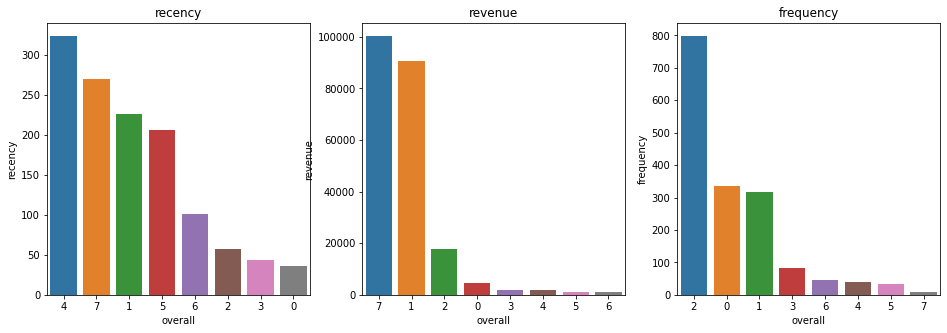

In [61]:
plt.figure(figsize = (16, 5))

plt.subplot(1, 3, 1)
order = rfm.groupby('overall')[['recency']].mean().sort_values(by='recency', ascending = False).index
sns.barplot(data = rfm, x = 'overall', y = 'recency', order = order, ci = None)
plt.title('recency');

plt.subplot(1, 3, 2)
order = rfm.groupby('overall')[['revenue']].mean().sort_values(by='revenue', ascending = False).index
sns.barplot(data = rfm, x = 'overall', y = 'revenue', order = order, ci = None)
plt.title('revenue');

plt.subplot(1, 3, 3)
order = rfm.groupby('overall')[['frequency']].mean().sort_values(by='frequency', ascending = False).index
sns.barplot(data = rfm, x = 'overall', y = 'frequency', order = order, ci = None)
plt.title('frequency');


# CUSTOMER ANALYSIS

In [62]:
customer = customer.merge(rfm, on ='CustomerID')

In [63]:
customer.head()

,CustomerID,gender,age,anual_income,recency,frequency,revenue,recency_cluster,frequency_cluster,revenue_cluster,overall
0,17850.0,Female,48,25,325,312,5493.79,1,0,0,1
1,13047.0,Male,47,65,54,196,3395.98,0,0,0,0
2,13748.0,Female,59,43,118,28,948.25,3,3,0,6
3,15100.0,Female,31,33,353,6,1116.90,1,3,0,4
4,15291.0,Female,70,24,48,109,4740.09,0,3,0,3


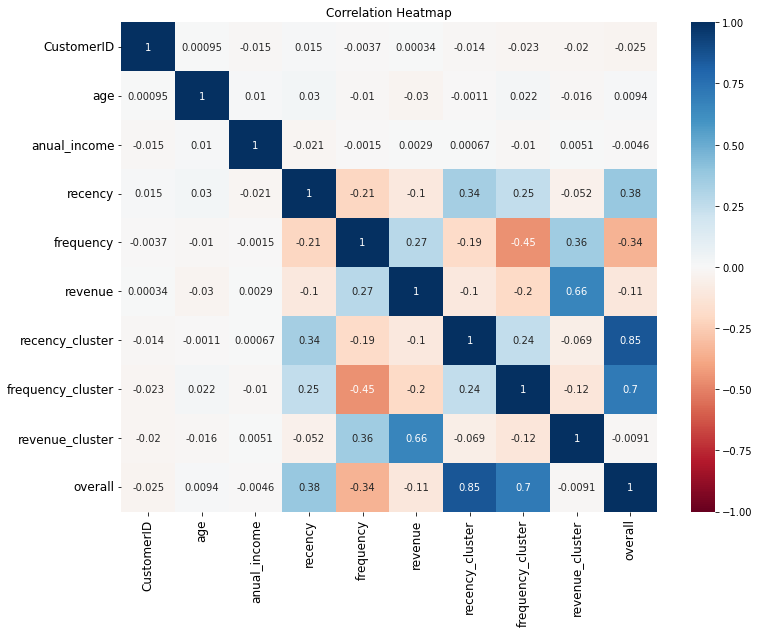

In [64]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(customer.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## CLUSTER ANALYSIS

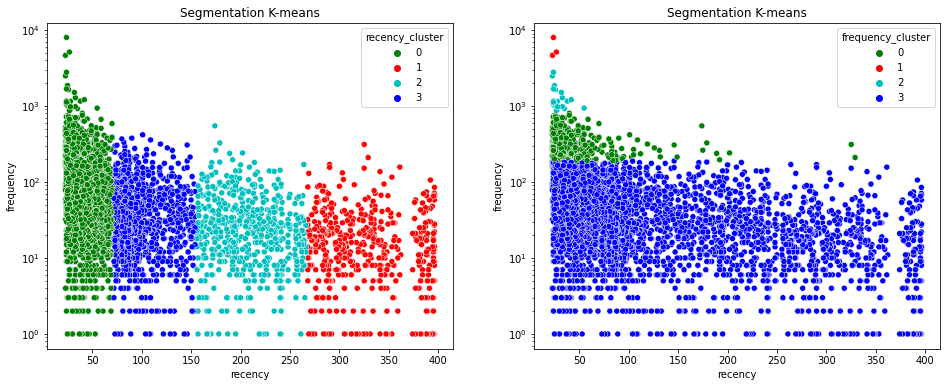

In [65]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
ax = sns.scatterplot(data = customer, x='recency', y = 'frequency', hue = customer['recency_cluster'],
                    palette = ['g', 'r', 'c', 'blue'])
plt.title('Segmentation K-means')
ax.set_yscale("log")

plt.subplot(1, 2, 2)
ax = sns.scatterplot(data = customer, x='recency', y = 'frequency', hue = customer['frequency_cluster'],
                    palette = ['g', 'r', 'c', 'blue'])
plt.title('Segmentation K-means')
ax.set_yscale("log")



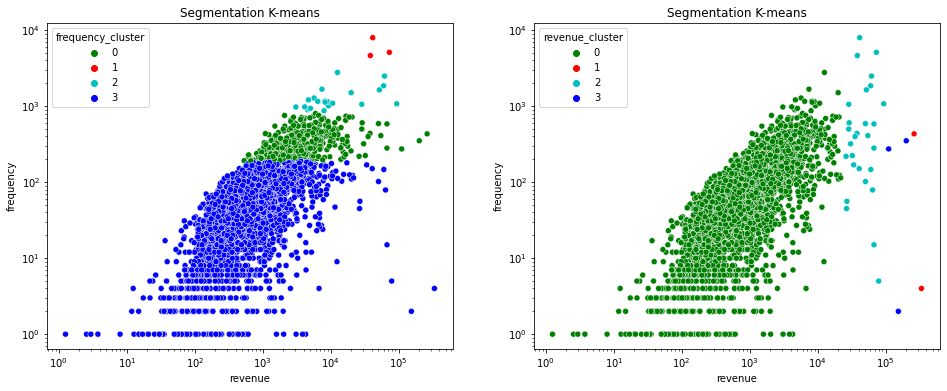

In [66]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
ax = sns.scatterplot(data = customer, x='revenue', y = 'frequency', hue = customer['frequency_cluster'],
                    palette = ['g', 'r', 'c', 'blue'])
plt.title('Segmentation K-means')
ax.set_xscale('log')
ax.set_yscale('log')

plt.subplot(1, 2, 2)
ax = sns.scatterplot(data = customer, x='revenue', y = 'frequency', hue = customer['revenue_cluster'],
                    palette = ['g', 'r', 'c', 'blue'])
plt.title('Segmentation K-means')
ax.set_xscale('log')
ax.set_yscale('log')


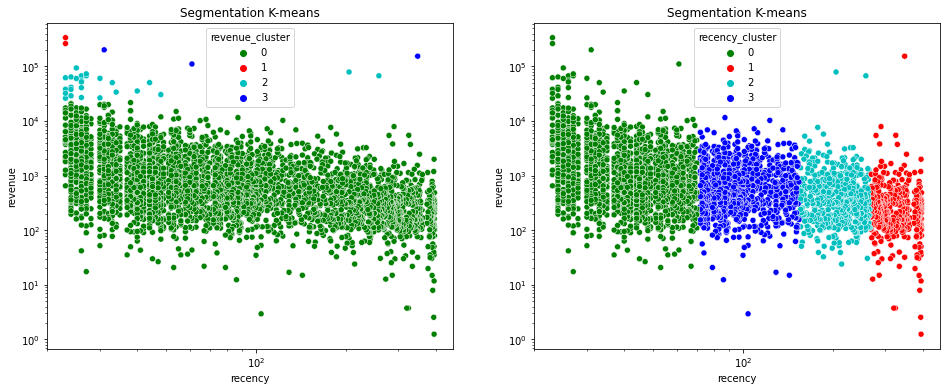

In [67]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
ax = sns.scatterplot(data = customer, x='recency', y = 'revenue', hue = customer['revenue_cluster'],
                    palette = ['g', 'r', 'c', 'blue'])
plt.title('Segmentation K-means')
ax.set_xscale('log')
ax.set_yscale('log')

plt.subplot(1, 2, 2)
ax = sns.scatterplot(data = customer, x='recency', y = 'revenue', hue = customer['recency_cluster'],
                    palette = ['g', 'r', 'c', 'blue'])
plt.title('Segmentation K-means')
ax.set_xscale('log')
ax.set_yscale('log')
